In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from utility import util
import numpy as np

# Загрузка изображения

In [3]:
image1 = cv.imread('./Data/lenna.png')
image2 = cv.imread('./Data/lenna_bad.png')
    gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

(([], []), ([], []))

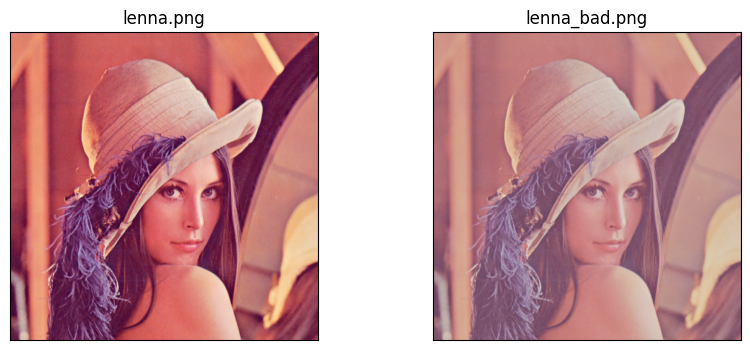

In [4]:
gs = plt.GridSpec(1, 2)
plt.figure(figsize=(10, 4))
plt.subplot(gs[0])
plt.imshow(rgb_image1)
plt.title('lenna.png')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(rgb_image2)
plt.title('lenna_bad.png')
plt.xticks([]), plt.yticks([])

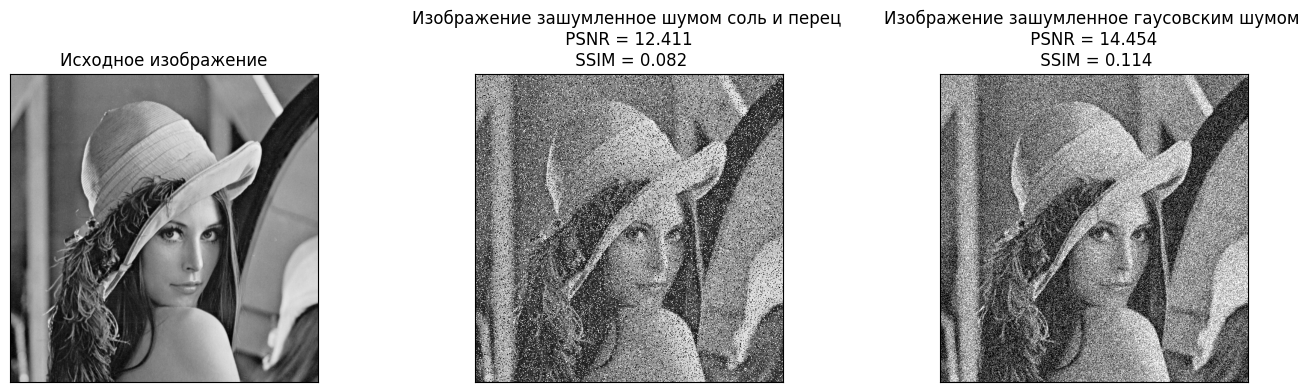

In [5]:
gs = plt.GridSpec(1, 3)
plt.figure(figsize=(17, 4))

plt.subplot(gs[0])
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.imshow(gray_image1, cmap='gray')

plt.subplot(gs[1])
plt.xticks([]), plt.yticks([])
noisy_image = util.add_salt_and_peper_noise(gray_image1, 0.2)
psnr = util.getPSNR(gray_image1, noisy_image)
ssim = util.getSSIM(gray_image1, noisy_image)
plt.title(f'Изображение зашумленное шумом соль и перец \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(gs[2])
plt.xticks([]), plt.yticks([])
noisy_image = util.add_gauss_noise(gray_image1, 0, 0.2)
psnr = util.getPSNR(gray_image1, noisy_image)
ssim = util.getSSIM(gray_image1, noisy_image)
plt.title(f'Изображение зашумленное гаусовским шумом \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')
plt.imshow(noisy_image, 'gray')
plt.show()

# Фильтрация

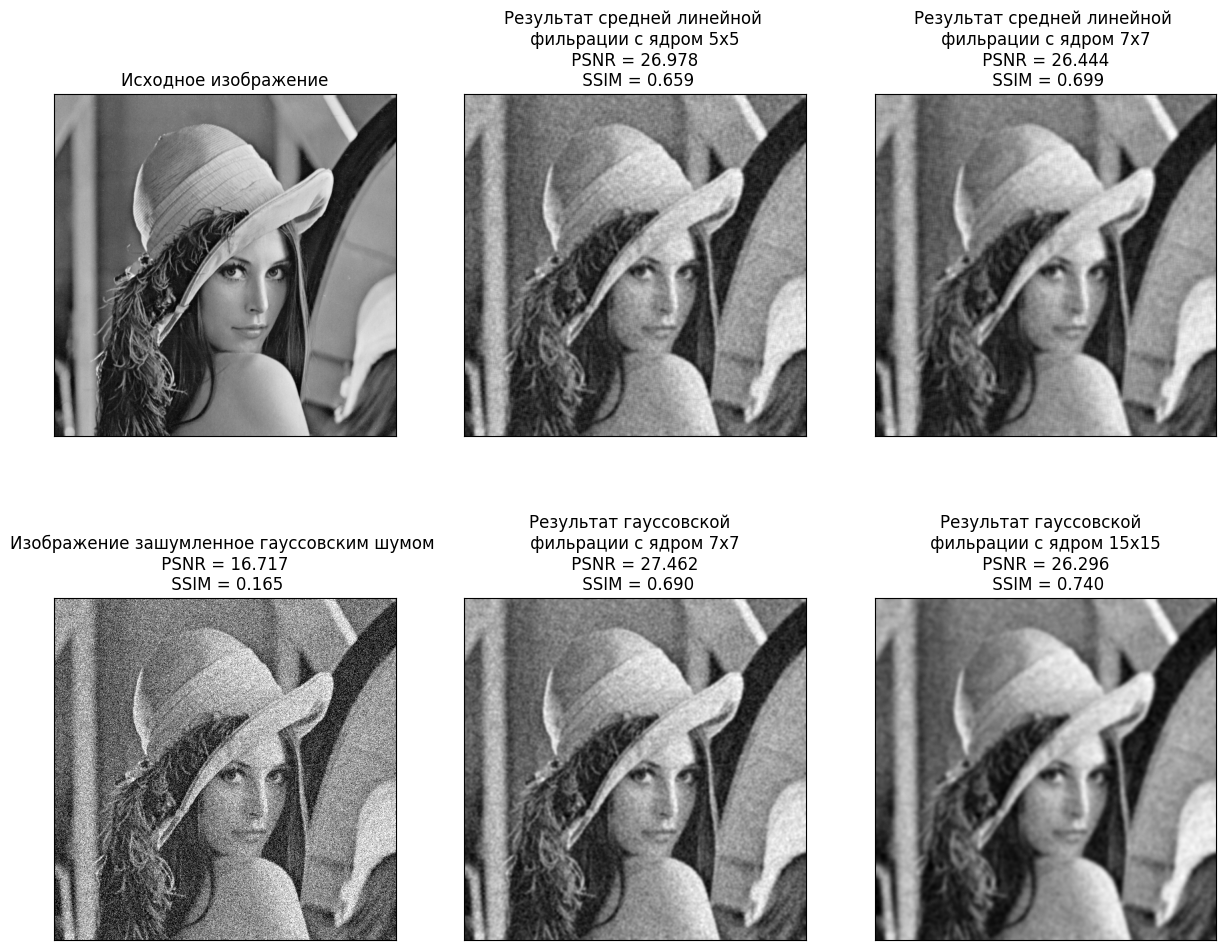

In [6]:
kernel55 = np.ones((5, 5), np.float32) / 25
kernel77 = np.ones((7, 7), np.float32) / 49

noisy_image = util.add_gauss_noise(gray_image1, 0, 0.15)

filtered_image1 = cv.filter2D(noisy_image, -1, kernel55)
filtered_image2 = cv.filter2D(noisy_image, -1, kernel77)
gaussian_image1 = cv.GaussianBlur(noisy_image, (7, 7), 0)
gaussian_image2 = cv.GaussianBlur(noisy_image, (15, 15), 0)

# вывод
gs = plt.GridSpec(2, 3)
plt.figure(figsize=(15, 12))

plt.subplot(gs[0, 0])
plt.xticks([]), plt.yticks([])
plt.title('Исходное изображение')
plt.imshow(gray_image1, cmap='gray')

plt.subplot(gs[1, 0])
plt.xticks([]), plt.yticks([])
plt.imshow(noisy_image, cmap='gray')
psnr = util.getPSNR(gray_image1, noisy_image)
ssim = util.getSSIM(gray_image1, noisy_image)
plt.title(f'Изображение зашумленное гауссовским шумом \n PSNR = {psnr:.3f} \n SSIM = {ssim:.3f}')

plt.subplot(gs[0, 1])
plt.xticks([]), plt.yticks([])
plt.title(f'Результат средней линейной \n фильрации с ядром 5х5 \n '
          f'PSNR = {util.getPSNR(gray_image1, filtered_image1):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, filtered_image1):.3f}')
plt.imshow(filtered_image1, 'gray')

plt.subplot(gs[0, 2])
plt.xticks([]), plt.yticks([])
plt.title(f'Результат средней линейной \n фильрации с ядром 7х7 \n '
          f'PSNR = {util.getPSNR(gray_image1, filtered_image2):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, filtered_image2):.3f}')
plt.imshow(filtered_image2, 'gray')

plt.subplot(gs[1, 1])
plt.xticks([]), plt.yticks([])
plt.title(f'Результат гауссовской  \n фильрации с ядром 7х7 \n '
          f'PSNR = {util.getPSNR(gray_image1, gaussian_image1):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, gaussian_image1):.3f}')
plt.imshow(gaussian_image1, 'gray')

plt.subplot(gs[1, 2])
plt.xticks([]), plt.yticks([])
plt.title(f'Результат гауссовской  \n фильрации с ядром 15х15 \n '
          f'PSNR = {util.getPSNR(gray_image1, gaussian_image2):.3f} \n '
          f'SSIM = {util.getSSIM(gray_image1, gaussian_image2):.3f}')
plt.imshow(gaussian_image2, 'gray')

plt.show()

/var/folders/94/ckspgvws6gn417rrw7dtk0j80000gn/T/ipykernel_83155/3181738654.py:22: RuntimeWarning: divide by zero encountered in log
  magnitude_dft_shift_masked = 20 * np.log(


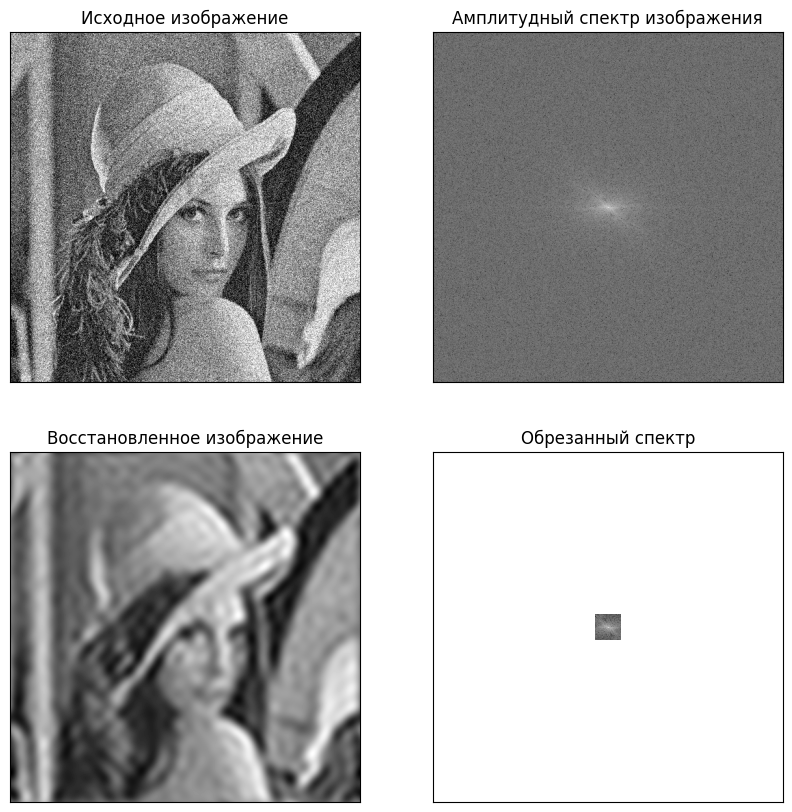

In [24]:
r = 20

# img = gray_image1
img = noisy_image

rows, cols = img.shape
crow, ccol = np.uint32((rows / 2, cols / 2))

mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - r:crow + r, ccol - r:ccol + r] = 1

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

dft_shift_masked = dft_shift * mask
f_ishift = np.fft.ifftshift(dft_shift_masked)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[..., 0], img_back[..., 1])

magnitude_dft_shift = 20 * np.log(
    cv.magnitude(dft_shift[..., 0], dft_shift[..., 1]))
magnitude_dft_shift_masked = 20 * np.log(
    cv.magnitude(dft_shift_masked[..., 0], dft_shift_masked[..., 1]))

plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitude_dft_shift, cmap='gray')
plt.title('Амплитудный спектр изображения'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_back, cmap='gray')
plt.title('Восстановленное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(magnitude_dft_shift_masked, cmap='gray')
plt.title('Обрезанный спектр'), plt.xticks([]), plt.yticks([])
plt.show()